# Examining what impact the introduction of ULEZ and Covid lockdown had on the air pollution levels in Hammersmith.

# ULEZ

### The Ultra Low Emission Zone (ULEZ) in London was first introduced on April 8, 2019, with the goal of improving air quality by reducing the number of high-polluting vehicles in the city. Initially, the zone covered the same area as the Congestion Charge Zone in Central London. On October 25, 2021, the ULEZ was expanded to include a larger area bounded by the North and South Circular Roads, encompassing the borough of Fulham and Hammersmith.
https://www.intelligenttransport.com/transport-articles/148922/history-london-ultra-low-emission-zone/
<img src="ULEZsign.avif" alt="ULEZsign" style="width: 500px;"/>

### The following analysis compares air pollution data from the period before the implementation of ULEZ in Hammersmith with data from the corresponding period in the subsequent year. Its objective is to identify any discernible reductions in pollutant levels during this interval. The investigation will specifically target pollutants closely associated with traffic, namely:
- CO (Carbon Monoxide)
- NO (Nitric Oxide)
- NO2 (Nitrogen Dioxide)
- PM2.5 (Particulate Matter with diameter less than 2.5 micrometers)
- PM10 (Particulate Matter with diameter less than 10 micrometers)

### Air polution data has been extracted from [Open Weather API Air Pollution History](https://openweathermap.org/api/air-pollution#history)
Coordinates used were for Hammersmith Town Centre (HF5) (Latitude: 51.492695, Longitude: -0.224787) as provided in:
https://www.airqualityengland.co.uk/site/latest?site_id=HF5

### Collecting Data from API

In [1]:
import requests
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Fetching data from API
def fetch_air_pollution_data(api_key, lat, lon, start_date_unix, end_date_unix):
    api_endpoint = "http://api.openweathermap.org/data/2.5/air_pollution/history?lat={}&lon={}&start={}&end={}&appid={}".format(lat, lon, start_date_unix, end_date_unix, api_key)
    response = requests.get(api_endpoint)
    
    if response.status_code == 200:
        return response.json()
    else:
        print('Failed to fetch data:', response.status_code)
        return None
    
#Converting data to unit format
def date_to_unix_time(year, month, day, hour=0, minute=0, second=0):
    dt = datetime.datetime(year, month, day, hour, minute, second)
    return int(dt.timestamp())

api_key = "f367e8fb054573c2e98b66d849b8e193"  #Enter your API KEY here!
lat = 51.4926  #Latitude
lon = -0.2247  #Longitude

start_date = (2020, 10, 25)  #(year, month, day)
end_date = (2022, 10, 24)  #(year, month, day)

start_date_unix = date_to_unix_time(*start_date)
end_date_unix = date_to_unix_time(*end_date)

air_pollution_data = fetch_air_pollution_data(api_key, lat, lon, start_date_unix, end_date_unix)

if air_pollution_data:
    data_2021 = pd.json_normalize(air_pollution_data['list'])
    data_2021.to_csv('air_pollution_data_Hammersmith_Oct20_Oct22.csv', index=False)
    print('Data saved to air_pollution_data_Hammersmith_Oct20_Oct22.csv file.')
else:
    print('No data to save.')

Data saved to air_pollution_data_Hammersmith_Oct20_Oct22.csv file.


### Opening in Dataframe

In [2]:
api_data = pd.read_csv('air_pollution_data_Hammersmith_Oct20_Oct22.csv')
api_data

,dt,main.aqi,components.co,components.no,components.no2,components.o3,components.so2,components.pm2_5,components.pm10,components.nh3
0,1606266000,1,216.96,0.0,8.82,63.66,3.46,5.03,6.36,0.74
1,1606269600,1,216.96,0.0,7.71,64.37,3.37,5.84,7.35,0.71
2,1606273200,1,216.96,0.0,7.28,64.37,3.52,6.03,7.92,0.65
3,1606276800,1,216.96,0.0,7.28,63.66,3.73,6.13,8.45,0.58
4,1606280400,1,216.96,0.0,7.88,60.08,3.93,6.38,9.09,0.52
...,...,...,...,...,...,...,...,...,...,...
16626,1666551600,1,183.58,0.0,7.37,49.35,2.32,1.53,1.78,0.18
16627,1666555200,1,178.58,0.0,6.17,55.79,2.15,1.27,1.59,0.19
16628,1666558800,1,176.91,0.0,5.31,63.66,1.97,1.13,1.43,0.18
16629,1666562400,1,178.58,0.0,4.58,65.80,1.79,1.18,1.48,0.15


### Data Preparation and Cleaning

In [3]:
#Sorting out column names
def drop_prefix(col_name):
    return col_name.split('.')[-1]

api_data.rename(columns=drop_prefix, inplace=True)
api_data.columns = api_data.columns.str.upper()

#Verifying if column name update worked, checking data types and if number of non-null records in columns is consistent
api_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16631 entries, 0 to 16630
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DT      16631 non-null  int64  
 1   AQI     16631 non-null  int64  
 2   CO      16631 non-null  float64
 3   NO      16631 non-null  float64
 4   NO2     16631 non-null  float64
 5   O3      16631 non-null  float64
 6   SO2     16631 non-null  float64
 7   PM2_5   16631 non-null  float64
 8   PM10    16631 non-null  float64
 9   NH3     16631 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 1.3 MB


In [4]:
#Converting DT to a new column in datetime format and assigning as index
api_data['Timestamp'] = pd.to_datetime(api_data['DT'], unit='s')
api_data.drop(columns=['DT'], inplace=True)
api_data.set_index('Timestamp', inplace=True)
api_data.index

DatetimeIndex(['2020-11-25 01:00:00', '2020-11-25 02:00:00',
               '2020-11-25 03:00:00', '2020-11-25 04:00:00',
               '2020-11-25 05:00:00', '2020-11-25 06:00:00',
               '2020-11-25 07:00:00', '2020-11-25 08:00:00',
               '2020-11-25 09:00:00', '2020-11-25 10:00:00',
               ...
               '2022-10-23 14:00:00', '2022-10-23 15:00:00',
               '2022-10-23 16:00:00', '2022-10-23 17:00:00',
               '2022-10-23 18:00:00', '2022-10-23 19:00:00',
               '2022-10-23 20:00:00', '2022-10-23 21:00:00',
               '2022-10-23 22:00:00', '2022-10-23 23:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=16631, freq=None)

In [5]:
#Dropping columns not needed for analysis
api_data.drop(columns=['AQI','O3', 'SO2', 'NH3'], inplace=True)

In [6]:
#Brief overview, looking for anomalies
api_data.describe()

,CO,NO,NO2,PM2_5,PM10
count,16631.000000,16631.000000,16631.000000,16631.000000,16631.000000
mean,250.355341,6.394419,19.400101,6.938633,8.706227
std,80.472160,23.146664,15.759266,8.073183,8.655860
min,141.860000,0.000000,1.340000,0.500000,0.530000
25%,198.600000,0.010000,8.230000,2.370000,3.500000
50%,236.990000,0.350000,14.050000,4.160000,6.070000
75%,277.040000,1.660000,25.360000,8.050000,10.550000
max,1268.390000,447.030000,126.120000,104.540000,108.950000


The count for all variables is the same confirming no missing data.
While the maximum values for each variable are considerably higher than the 75th percentile and therefore suggesting the presence of outliers, the mean and median (50th percentile) values seem reasonably close to each other, indicating that the data might not be heavily skewed. The range between the minimum and maximum values seems plausible for pollutants, however the minimum value of 0.00 of NO is unliley and will require a data fix.

In [7]:
#Replacing 0 values with NaN
api_data.replace(0, np.nan, inplace=True)

#Replacing NaN values with mean for 'NO' column
api_data['NO'] = api_data['NO'].fillna(api_data['NO'].mean())
api_data.describe()

,CO,NO,NO2,PM2_5,PM10
count,16631.000000,16631.000000,16631.000000,16631.000000,16631.000000
mean,250.355341,8.492699,19.400101,6.938633,8.706227
std,80.472160,22.854977,15.759266,8.073183,8.655860
min,141.860000,0.010000,1.340000,0.500000,0.530000
25%,198.600000,0.340000,8.230000,2.370000,3.500000
50%,236.990000,1.620000,14.050000,4.160000,6.070000
75%,277.040000,8.492699,25.360000,8.050000,10.550000
max,1268.390000,447.030000,126.120000,104.540000,108.950000


In [8]:
#Resampling data to monthly averages to smooth out fluctuations
monthly_data = api_data.resample('M').mean()
monthly_data.sample()

,CO,NO,NO2,PM2_5,PM10
Timestamp,,,,,
2021-07-31,187.743737,4.225586,13.628575,6.945847,8.489126


### Visualizaing Data 

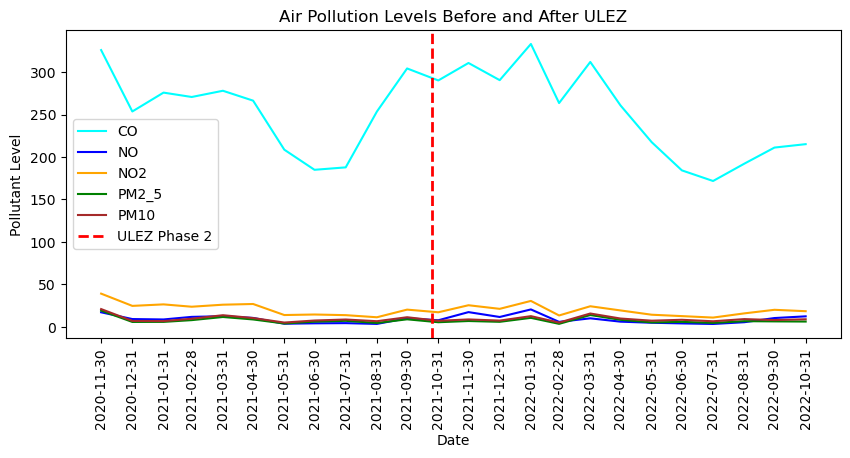

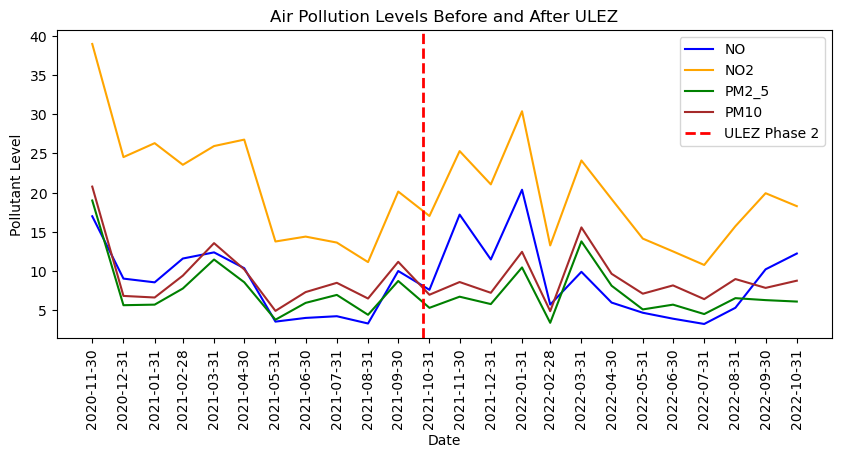

In [10]:
#Plotting the data (monthly average) including the ULEZ introduction date marked

event_date = '2021-10-25' #ULEZ introduction in Hammersmith
event_date = pd.to_datetime(event_date)

# Define a color palette
color_palette = {
    'CO': 'cyan',
    'NO': 'blue',
    'NO2': 'orange',
    'PM2_5': 'green',
    'PM10': 'brown'
}

# Plotting all pollutants
plt.figure(1, figsize=(10, 4))
plt.plot(monthly_data.index, monthly_data['CO'], label='CO', color=color_palette['CO'])
plt.plot(monthly_data.index, monthly_data['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data.index, monthly_data['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data.index, monthly_data['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data.index, monthly_data['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ')
plt.xticks(monthly_data.index, rotation=90)
plt.legend()
plt.show()

# Plotting the same data but without CO for better visibility of other pollutants levels' fluctuations
plt.figure(2, figsize=(10, 4))
plt.plot(monthly_data.index, monthly_data['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data.index, monthly_data['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data.index, monthly_data['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data.index, monthly_data['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ')
plt.xticks(rotation=90)
plt.xticks(monthly_data.index, rotation=90)
plt.legend()
plt.show()


### Extracting data for the same period from alternative source [Air Quality England](https://www.airqualityengland.co.uk/local-authority/data?la_id=195) to validate the API data:

- Monitoring Site: 'Hammersmith Town Center'
- Time period: 25/10/2020 - 24/10/2021, all pollutants. Saving files as 'Hammersmith_air_pollution_pre_ULEZ'
- Time period: 25/10/2021 - 24/10/2022, all pollutants. Saving files as 'Hammersmith_air_pollution_post_ULEZ'

CO (Carbon Monoxide) data:
CO levels are not included in the AQE data, mostly likley due to the fact that they're not among the 5 pollutants used to calculate daily air quality index .
Government sources also confirm that the total UK emissions of carbon monoxide have signicantly reduced with downward emission trend present and the main concern is over CO contcentration indoors, which is beyond the scope of this project. https://uk-air.defra.gov.uk/assets/documents/reports/cat13/northern_ireland/chap3a.html
Given the above, the analysis will progress analysing NO, NO2, PM2.5 and PM10 only for the remainder of the report.

CO (Carbon Monoxide) data:
Carbon monoxide (CO) levels are not available in the AQE data, primarily because they are not included among the five pollutants used to calculate the daily Air Quality Index (AQI) as outlined by the UK Department for Environment, Food & Rural Affairs [DEFRA](https://uk-air.defra.gov.uk/air-pollution/daqi?view=more-info).
Monitoring data indicates a consistent decline in annual average concentrations of Carbon Monoxide over recent years, consistently placing it within the "low" banding. This reduction can be attributed to enhanced vehicle engine efficiency and the implementation of catalytic converters, which mitigate the emission of certain pollutant gases from exhaust systems. https://londonair.org.uk/LondonAir/guide/WhatIsCO.aspx
Considering the above limitations, the analysis will proceed by examining data related to NO, NO2, PM2.5, and PM10 exclusively for the remainder of this report.

Data Extraction Error:
To prevent 'Error tokenizing data. C error: Expected .. fields in line .., saw ..', small manipulation in file were applied - header 'Hourly Data'copied along above 'End Time' column and location 'Hammersmith Town Centre' copied along above pollutant name and status columns. This allows loading file into dataframe without error.

### Collecting Data for pre- and post- ULEZ

In [11]:
data_pre_ULEZ = pd.read_csv('Hammersmith_air_pollution_pre_ULEZ.csv', header=None)
data_pre_ULEZ

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,24/10/2021,22:00:00,12.5,R ugm-3 (Ref.eq),13.24242,R ugm-3,30.36912,R ugm-3,50.67388,R ugm-3,16.28561,R ugm-3,7,R ugm-3 (BAM)
8764,24/10/2021,23:00:00,14.2,R ugm-3 (Ref.eq),10.28488,R ugm-3,23.61812,R ugm-3,39.38806,R ugm-3,29.81157,R ugm-3,5,R ugm-3 (BAM)
8765,24/10/2021,24:00:00,16.7,R ugm-3 (Ref.eq),7.9686,R ugm-3,17.86212,R ugm-3,30.08047,R ugm-3,38.01235,R ugm-3,6,R ugm-3 (BAM)
8766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Defining where header is located (identified during file interogation)
new_header = data_pre_ULEZ.iloc[5]

data_pre_ULEZ_cleaned = data_pre_ULEZ[6:-2]  #Excluding top 4 and bottom 2 rows of data which are not relevant
data_pre_ULEZ_cleaned.columns = new_header

data_pre_ULEZ_cleaned

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,25/10/2020,01:00:00,4.2,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,60.92872,R ugm-3,5,R ugm-3 (BAM)
7,25/10/2020,02:00:00,10,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,61.06177,R ugm-3,19,R ugm-3 (BAM)
8,25/10/2020,03:00:00,5.8,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,56.20889,R ugm-3,2,R ugm-3 (BAM)
9,25/10/2020,04:00:00,15,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,50.61594,R ugm-3,20,R ugm-3 (BAM)
10,25/10/2020,05:00:00,6.7,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,48.20613,R ugm-3,2,R ugm-3 (BAM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,24/10/2021,20:00:00,13.3,R ugm-3 (Ref.eq),33.60862,R ugm-3,51.48189,R ugm-3,103.0144,R ugm-3,28.0575,R ugm-3,6,R ugm-3 (BAM)
8762,24/10/2021,21:00:00,16.7,R ugm-3 (Ref.eq),62.30588,R ugm-3,51.60196,R ugm-3,132.86493,R ugm-3,18.46267,R ugm-3,8,R ugm-3 (BAM)
8763,24/10/2021,22:00:00,12.5,R ugm-3 (Ref.eq),13.24242,R ugm-3,30.36912,R ugm-3,50.67388,R ugm-3,16.28561,R ugm-3,7,R ugm-3 (BAM)
8764,24/10/2021,23:00:00,14.2,R ugm-3 (Ref.eq),10.28488,R ugm-3,23.61812,R ugm-3,39.38806,R ugm-3,29.81157,R ugm-3,5,R ugm-3 (BAM)


In [13]:
data_post_ULEZ = pd.read_csv('Hammersmith_air_pollution_post_ULEZ.csv', header=None)
data_post_ULEZ.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,25/10/2021,01:00:00,15,R ugm-3 (Ref.eq),7.08058,R ugm-3,17.13078,R ugm-3,27.98753,R ugm-3,35.52512,R ugm-3,4,R ugm-3 (BAM)
7,25/10/2021,02:00:00,12.5,R ugm-3 (Ref.eq),5.44934,R ugm-3,10.26806,R ugm-3,18.6236,R ugm-3,NaN,NaN,7,R ugm-3 (BAM)
8,25/10/2021,03:00:00,12.5,R ugm-3 (Ref.eq),5.59431,R ugm-3,15.89111,R ugm-3,24.46893,R ugm-3,33.66282,R ugm-3,6,R ugm-3 (BAM)
9,25/10/2021,04:00:00,10.8,R ugm-3 (Ref.eq),6.6055,R ugm-3,15.75382,R ugm-3,25.8821,R ugm-3,32.92236,R ugm-3,7,R ugm-3 (BAM)


In [14]:
#Defining where header is located
new_header = data_post_ULEZ.iloc[5]

data_post_ULEZ_cleaned = data_post_ULEZ[6:-2]  #Excluding top 4 and bottom 2 rows of data which are not relevant
data_post_ULEZ_cleaned.columns = new_header

data_post_ULEZ_cleaned

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,25/10/2021,01:00:00,15,R ugm-3 (Ref.eq),7.08058,R ugm-3,17.13078,R ugm-3,27.98753,R ugm-3,35.52512,R ugm-3,4,R ugm-3 (BAM)
7,25/10/2021,02:00:00,12.5,R ugm-3 (Ref.eq),5.44934,R ugm-3,10.26806,R ugm-3,18.6236,R ugm-3,NaN,NaN,7,R ugm-3 (BAM)
8,25/10/2021,03:00:00,12.5,R ugm-3 (Ref.eq),5.59431,R ugm-3,15.89111,R ugm-3,24.46893,R ugm-3,33.66282,R ugm-3,6,R ugm-3 (BAM)
9,25/10/2021,04:00:00,10.8,R ugm-3 (Ref.eq),6.6055,R ugm-3,15.75382,R ugm-3,25.8821,R ugm-3,32.92236,R ugm-3,7,R ugm-3 (BAM)
10,25/10/2021,05:00:00,18.3,R ugm-3 (Ref.eq),24.58424,R ugm-3,35.81999,R ugm-3,73.5153,R ugm-3,28.20528,R ugm-3,7,R ugm-3 (BAM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,24/10/2022,20:00:00,47.5,R ugm-3 (Ref.eq),27.56283,R ugm-3,46.4065,R ugm-3,88.66891,R ugm-3,28.0554,R ugm-3,7,R ugm-3 (BAM)
8762,24/10/2022,21:00:00,31.7,R ugm-3 (Ref.eq),23.62617,R ugm-3,29.65464,R ugm-3,65.88093,R ugm-3,40.60037,R ugm-3,5,R ugm-3 (BAM)
8763,24/10/2022,22:00:00,29.2,R ugm-3 (Ref.eq),10.93543,R ugm-3,28.69128,R ugm-3,45.45871,R ugm-3,44.14309,R ugm-3,4,R ugm-3 (BAM)
8764,24/10/2022,23:00:00,25,R ugm-3 (Ref.eq),5.53982,R ugm-3,20.41533,R ugm-3,28.9096,R ugm-3,45.69155,R ugm-3,4,R ugm-3 (BAM)


### Data Preparation and Cleaning

In [15]:
merged_data_ULEZ = pd.concat([data_pre_ULEZ_cleaned, data_post_ULEZ_cleaned])
merged_data_ULEZ #dataframe overview, checking if number of rows agrees with the two above combined

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,25/10/2020,01:00:00,4.2,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,60.92872,R ugm-3,5,R ugm-3 (BAM)
7,25/10/2020,02:00:00,10,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,61.06177,R ugm-3,19,R ugm-3 (BAM)
8,25/10/2020,03:00:00,5.8,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,56.20889,R ugm-3,2,R ugm-3 (BAM)
9,25/10/2020,04:00:00,15,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,50.61594,R ugm-3,20,R ugm-3 (BAM)
10,25/10/2020,05:00:00,6.7,R ugm-3 (Ref.eq),NaN,NaN,NaN,NaN,NaN,NaN,48.20613,R ugm-3,2,R ugm-3 (BAM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,24/10/2022,20:00:00,47.5,R ugm-3 (Ref.eq),27.56283,R ugm-3,46.4065,R ugm-3,88.66891,R ugm-3,28.0554,R ugm-3,7,R ugm-3 (BAM)
8762,24/10/2022,21:00:00,31.7,R ugm-3 (Ref.eq),23.62617,R ugm-3,29.65464,R ugm-3,65.88093,R ugm-3,40.60037,R ugm-3,5,R ugm-3 (BAM)
8763,24/10/2022,22:00:00,29.2,R ugm-3 (Ref.eq),10.93543,R ugm-3,28.69128,R ugm-3,45.45871,R ugm-3,44.14309,R ugm-3,4,R ugm-3 (BAM)
8764,24/10/2022,23:00:00,25,R ugm-3 (Ref.eq),5.53982,R ugm-3,20.41533,R ugm-3,28.9096,R ugm-3,45.69155,R ugm-3,4,R ugm-3 (BAM)


In [16]:
#Dropping columns not required for this analysis
merged_data_ULEZ = merged_data_ULEZ.drop(columns=['End Time', 'Status/units', 'NOXasNO2', 'O3'])
merged_data_ULEZ.rename(columns = {'PM25':'PM2_5'}, inplace=True)
merged_data_ULEZ = merged_data_ULEZ.dropna(how='all') #Removing all-Nan rows 
merged_data_ULEZ = merged_data_ULEZ.dropna(thresh=2) #Removing rows which have less than 2 values (i.e. at least date and 1 pollutant)
merged_data_ULEZ

5,End Date,PM10,NO,NO2,PM2_5
6,25/10/2020,4.2,NaN,NaN,5
7,25/10/2020,10,NaN,NaN,19
8,25/10/2020,5.8,NaN,NaN,2
9,25/10/2020,15,NaN,NaN,20
10,25/10/2020,6.7,NaN,NaN,2
...,...,...,...,...,...
8761,24/10/2022,47.5,27.56283,46.4065,7
8762,24/10/2022,31.7,23.62617,29.65464,5
8763,24/10/2022,29.2,10.93543,28.69128,4
8764,24/10/2022,25,5.53982,20.41533,4


In [17]:
#dataframe overview to identify next steps
merged_data_ULEZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15528 entries, 6 to 8765
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   End Date  15528 non-null  object
 1   PM10      14655 non-null  object
 2   NO        15145 non-null  object
 3   NO2       15137 non-null  object
 4   PM2_5     14970 non-null  object
dtypes: object(5)
memory usage: 727.9+ KB


In [18]:
#Converting object datatypes to float
merged_data_ULEZ[['PM10','NO', 'NO2', 'PM2_5']] = merged_data_ULEZ[['PM10','NO', 'NO2', 'PM2_5']].astype(float)

#Converting End Date to a new column in datetime format and assigning as index
merged_data_ULEZ['Date'] = pd.to_datetime(merged_data_ULEZ['End Date'], format='%d/%m/%Y')
merged_data_ULEZ.set_index('Date', inplace=True)
merged_data_ULEZ.drop(columns=['End Date'], inplace=True)
merged_data_ULEZ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15528 entries, 2020-10-25 to 2022-10-24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    14655 non-null  float64
 1   NO      15145 non-null  float64
 2   NO2     15137 non-null  float64
 3   PM2_5   14970 non-null  float64
dtypes: float64(4)
memory usage: 606.6 KB


In [19]:
merged_data_ULEZ.isna().sum()

5
PM10     873
NO       383
NO2      391
PM2_5    558
dtype: int64

Text(0.5, 1.0, 'Heatmap of Missing Values in ULEZ Data')

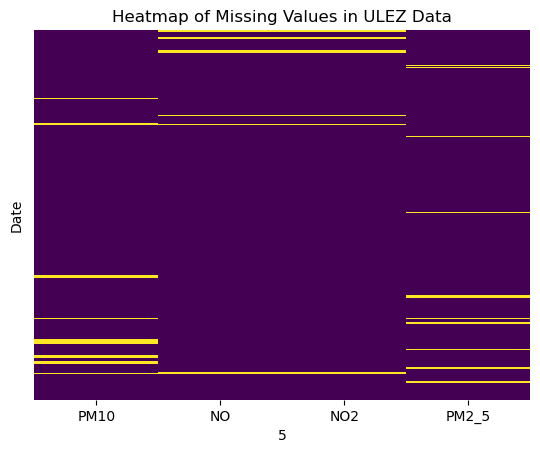

In [20]:
#Visualization of missing data via heatmap
sns.heatmap(merged_data_ULEZ.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Heatmap of Missing Values in ULEZ Data')

In [23]:
merged_data_ULEZ.describe() #Brief overview, looking for anomalies

5,PM10,NO,NO2,PM2_5
count,14641.000000,15145.000000,15137.000000,14600.000000
mean,20.506236,38.998535,44.120945,11.548836
std,13.670486,46.894241,27.588076,9.844583
min,0.800000,0.033990,0.773160,0.400000
25%,12.500000,7.840970,22.815410,5.400000
50%,17.500000,21.421800,39.024070,9.000000
75%,25.000000,53.284990,60.238460,14.400000
max,243.300000,520.730190,300.888520,179.000000


In [24]:
#Replacing negative and 0 values as NAN
merged_data_ULEZ['PM10'] = merged_data_ULEZ['PM10'].apply(lambda x: x if x >= 0 else np.nan)
merged_data_ULEZ['NO'] = merged_data_ULEZ['NO'].apply(lambda x: x if x >= 0 else np.nan)
merged_data_ULEZ['PM2_5'] = merged_data_ULEZ['PM2_5'].apply(lambda x: x if x >= 0 else np.nan)
merged_data_ULEZ.replace(0, np.nan, inplace=True)

In [25]:
#Replacing NAN values with mean
merged_data_ULEZ['PM10'] = merged_data_ULEZ['PM10'].fillna(merged_data_ULEZ['PM10'].mean())
merged_data_ULEZ['NO'] = merged_data_ULEZ['NO'].fillna(merged_data_ULEZ['NO'].mean())
merged_data_ULEZ['NO2'] = merged_data_ULEZ['NO2'].fillna(merged_data_ULEZ['NO2'].mean())
merged_data_ULEZ['PM2_5'] = merged_data_ULEZ['PM2_5'].fillna(merged_data_ULEZ['PM2_5'].mean())
merged_data_ULEZ.isna().sum()

5
PM10     0
NO       0
NO2      0
PM2_5    0
dtype: int64

In [26]:
merged_data_ULEZ.describe()

5,PM10,NO,NO2,PM2_5
count,15528.000000,15528.000000,15528.000000,15528.000000
mean,20.506236,38.998535,44.120945,11.548836
std,13.274272,46.312267,27.238501,9.545861
min,0.800000,0.033990,0.773160,0.400000
25%,12.500000,8.018915,23.246710,6.000000
50%,17.500000,22.567370,39.989035,9.400000
75%,24.200000,51.905453,59.583852,14.000000
max,243.300000,520.730190,300.888520,179.000000


In [27]:
#Resampling data to monthly averages to smooth out fluctuations
monthly_data_v2 = merged_data_ULEZ.resample('M').mean()
monthly_data_v2.sample()

5,PM10,NO,NO2,PM2_5
Date,,,,
2021-11-30,19.612134,52.048024,45.543883,11.589789


### Visualizaing Data

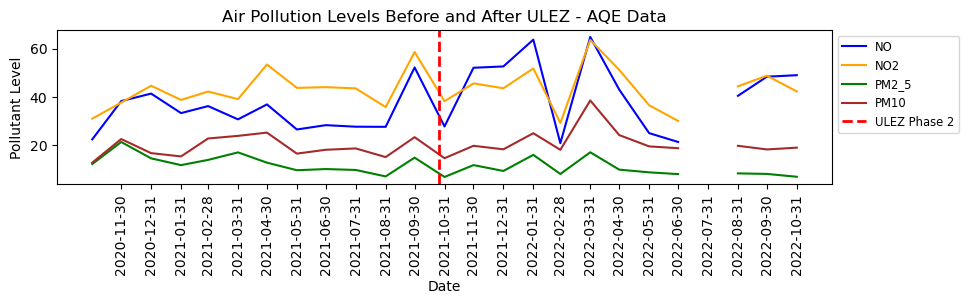

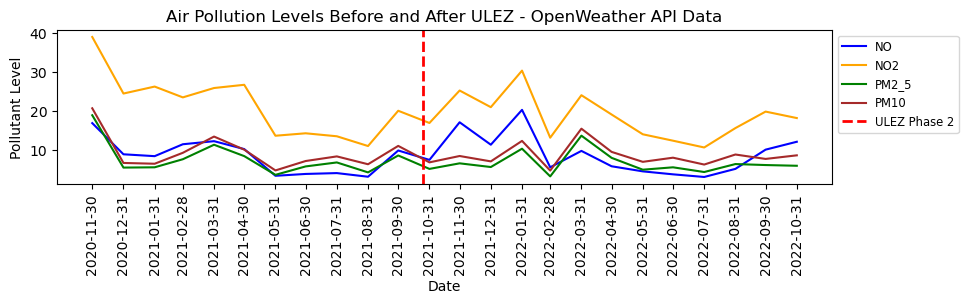

In [28]:
#Plotting both data sets (monthly average)

#AQE data
plt.figure(1, figsize=(10, 2))
plt.plot(monthly_data_v2.index, monthly_data_v2['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data_v2.index, monthly_data_v2['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data_v2.index, monthly_data_v2['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data_v2.index, monthly_data_v2['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ - AQE Data')
plt.xticks(monthly_data.index, rotation=90)
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

#API data (Open Weather)
#Plotting without CO for better comparison
plt.figure(2, figsize=(10, 2))
plt.plot(monthly_data.index, monthly_data['NO'], label='NO', color=color_palette['NO'])
plt.plot(monthly_data.index, monthly_data['NO2'], label='NO2', color=color_palette['NO2'])
plt.plot(monthly_data.index, monthly_data['PM2_5'], label='PM2_5', color=color_palette['PM2_5'])
plt.plot(monthly_data.index, monthly_data['PM10'], label='PM10', color=color_palette['PM10'])
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('Pollutant Level')
plt.title('Air Pollution Levels Before and After ULEZ - OpenWeather API Data')
plt.xticks(rotation=90)
plt.xticks(monthly_data.index, rotation=90)
plt.legend(loc='upper left', fontsize='small', bbox_to_anchor=(1, 1))
plt.show()

### Data inconsistencies:
While the second dataset was initially intended to serve as a validation tool for the API data, notable differences in pollutant levels were observed. Consequently, a thorough examination of both code and data sources was conducted to ensure data accuracy. Although the general trends align, particularly from October 2021 onwards, further investigation into the data's origins revealed that the API air pollution data was likely obtained from satellite monitors, potentially incorporating modeling techniques, and possibly encompassing a broader geographical area. Conversely, the Air Quality England data originates from a specific roadside monitor. It's worth noting that pollution levels recorded by satellite monitors may appear lower when compared to those measured by roadside monitors due to disparities in measurement methodologies, resolution, and proximity to pollution sources.https://openweathermap.org/accuracy-and-quality
Given these considerations and the primary focus of this analysis, it has been determined to proceed using the Air Quality England data.

There is a gap in the data on the graph between the end of June and August 2022. Upon verifying the source dataset, it was found that no data was reported during this period. Consequently, the threshold requirement of having at least two fields filled in was not met, resulting in the complete removal of these rows during the data cleansing process.

### Observations (line plots):
- All pollutants follow a similar fluctuation curve
- Significant fluctuations (observed in both data sets): increase in September 2021, drop around/just after ULEZ introduction date, increase in level for all in Jan 2022 and drop in Feb 2022 followed by another spike in March 2022

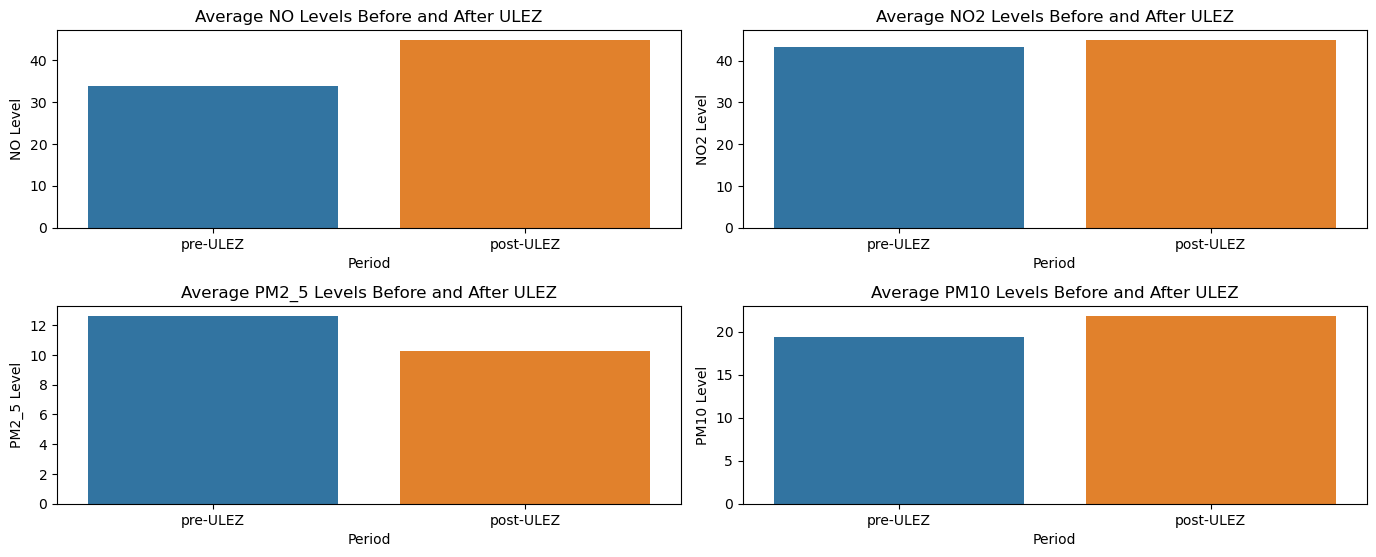

In [29]:
#Manipulating data further to compare average levels of all pollutants in pre- and post- ULEZ periods:

#Splitting the data into pre-ULEZ and post-ULEZ
#has to be split from merged_data_ULEZ as data cleaning was done after the merge
pre_ulez_data = merged_data_ULEZ[merged_data_ULEZ.index < event_date]
post_ulez_data = merged_data_ULEZ[merged_data_ULEZ.index >= event_date]

#Calculating the average values for each period, converting the series into dataframe and transposing
pre_ulez_avg = pre_ulez_data.mean().to_frame().T
post_ulez_avg = post_ulez_data.mean().to_frame().T
pre_ulez_avg['Period'] = 'pre-ULEZ'  #Adding the period label
post_ulez_avg['Period'] = 'post-ULEZ'

#Combining the data for plotting
combined_avg = pd.concat([pre_ulez_avg, post_ulez_avg])
combined_avg.reset_index(drop=True, inplace=True) 

#Creating the bar plot
pollutants = ['NO', 'NO2', 'PM2_5', 'PM10']
plt.figure(figsize=(14, 8))
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=combined_avg, x='Period', y=pollutant)
    plt.title(f'Average {pollutant} Levels Before and After ULEZ')
    plt.xlabel('Period')
    plt.ylabel(f'{pollutant} Level')

plt.tight_layout()
plt.show()

In [30]:
#Extracting the rows for pre-ULEZ and post-ULEZ
pre_ulez = combined_avg[combined_avg['Period'] == 'pre-ULEZ'].iloc[0]
post_ulez = combined_avg[combined_avg['Period'] == 'post-ULEZ'].iloc[0]

#Calculating percentage change
percentage_change = ((post_ulez[pollutants] - pre_ulez[pollutants]) / pre_ulez[pollutants]) * 100
formatted_percentage_change = percentage_change.apply(lambda x: f"{x:.2f}%")
print("Percentage change in average air pollutants levels between pre-ULEZ and post-ULEZ periods:")
print(formatted_percentage_change)

Percentage change in average air pollutants levels between pre-ULEZ and post-ULEZ periods:
5
NO        32.52%
NO2        3.97%
PM2_5    -18.64%
PM10      12.81%
dtype: object


### Observations (bar plot):
- PM2_5 is the only pollutant showing a significant decrease on annual scale (post ULEZ). The other 3 pollutants increased in the period post ULEZ, with Nitric Oxide (NO) showing a drastic 32% increase.

Considering that the pre-ULEZ period in Hammersmith overlapped with the COVID-19 lockdowns and restrictions of 2020 and 2021, the data from this timeframe may not provide a comprehensive view. Therefore, an analysis over a more extended period will be conducted below to ensure a more accurate assessment of ULEZ introduction while also analysing Covid impact.

## Covid

### The COVID-19 lockdown in London began on March 23, 2020, as part of the UK government's measures to curb the spread of the virus. Non-essential businesses were closed, public gatherings were banned, and residents were instructed to stay at home except for essential activities. The first lockdown lasted until restrictions began easing on June 1, 2020, with phased reopenings continuing through the summer. Subsequent lockdowns were imposed in November 2020 and January 2021 as infection rates surged again. These lockdowns had noticeable environmental effects, including temporary reductions in air pollution, which the below analysis will explore and visualize for Hammersmith.
https://en.wikipedia.org/wiki/COVID-19_lockdown_in_the_United_Kingdom

<img src="CovidLockdown.webp" alt="CovidLockdown" style="width: 500px;"/>

### Data on air pollution was extracted for each year 2019 - 2022 from: [Air Quality England](https://www.airqualityengland.co.uk/local-authority/data?la_id=195)

Monitoring Site: 'Hammersmith Town Center'
Time period: 01/01/2019 - 31/12/2019, all pollutants. 
Saving files as 'Hammersmith_air_pollution_2019'

Then repeating the above steps for 2020, 2021 and 2022.

To prevent 'Error tokenizing data. C error: Expected .. fields in line .., saw ..', small manipulation in file were applied - header 'Hourly Data'copied along above 'End Time' column and location 'Hammersmith Town Centre' copied along above pollutant name and status columns. This allows loading file into dataframe without error.

### Collecting Data for each year

In [31]:
data_2019 = pd.read_csv('Hammersmith_air_pollution_2019.csv', header=None)
data_2019.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,05/03/2019,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,05/03/2019,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,05/03/2019,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,05/03/2019,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_2019

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,31/12/2019,22:00:00,35,R ugm-3 (Ref.eq),109.91518,R ugm-3,59.63231,R ugm-3,228.16657,R ugm-3,4.34214,R ugm-3,24,R ugm-3 (BAM)
7252,31/12/2019,23:00:00,38.3,R ugm-3 (Ref.eq),126.17599,R ugm-3,56.54215,R ugm-3,250.00931,R ugm-3,4.81812,R ugm-3,31,R ugm-3 (BAM)
7253,31/12/2019,24:00:00,40.8,R ugm-3 (Ref.eq),109.19709,R ugm-3,39.17761,R ugm-3,206.61081,R ugm-3,2.89177,R ugm-3,36,R ugm-3 (BAM)
7254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
#Defining where header is located
new_header = data_2019.iloc[5]

data_2019_cleaned = data_2019[6:-2]  #Excluding top 4 and bottom 2 rows of data which are not relevant
data_2019_cleaned.columns = new_header

data_2019_cleaned

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,05/03/2019,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,05/03/2019,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,05/03/2019,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,05/03/2019,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,05/03/2019,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,31/12/2019,20:00:00,45.8,R ugm-3 (Ref.eq),124.1169,R ugm-3,72.42072,R ugm-3,262.73064,R ugm-3,3.23752,R ugm-3,28,R ugm-3 (BAM)
7250,31/12/2019,21:00:00,40.8,R ugm-3 (Ref.eq),152.01422,R ugm-3,71.09736,R ugm-3,304.18257,R ugm-3,2.99505,R ugm-3,29,R ugm-3 (BAM)
7251,31/12/2019,22:00:00,35,R ugm-3 (Ref.eq),109.91518,R ugm-3,59.63231,R ugm-3,228.16657,R ugm-3,4.34214,R ugm-3,24,R ugm-3 (BAM)
7252,31/12/2019,23:00:00,38.3,R ugm-3 (Ref.eq),126.17599,R ugm-3,56.54215,R ugm-3,250.00931,R ugm-3,4.81812,R ugm-3,31,R ugm-3 (BAM)


In [34]:
data_2020 = pd.read_csv('Hammersmith_air_pollution_2020.csv', header=None)
data_2020

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,31/12/2020,22:00:00,22.5,R ugm-3 (Ref.eq),69.18852,R ugm-3,57.2675,R ugm-3,163.35508,R ugm-3,16.00053,R ugm-3,24,R ugm-3 (BAM)
8788,31/12/2020,23:00:00,24.2,R ugm-3 (Ref.eq),15.86268,R ugm-3,44.3852,R ugm-3,68.70764,R ugm-3,20.73033,R ugm-3,20,R ugm-3 (BAM)
8789,31/12/2020,24:00:00,25,R ugm-3 (Ref.eq),33.25069,R ugm-3,52.79194,R ugm-3,103.77563,R ugm-3,19.32836,R ugm-3,26,R ugm-3 (BAM)
8790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
new_header = data_2020.iloc[5]

data_2020_cleaned = data_2020[6:-2]
data_2020_cleaned.columns = new_header

data_2020_cleaned.head()

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,01/01/2020,01:00:00,45,R ugm-3 (Ref.eq),121.60634,R ugm-3,46.59103,R ugm-3,233.05148,R ugm-3,7.58974,R ugm-3,42,R ugm-3 (BAM)
7,01/01/2020,02:00:00,58.3,R ugm-3 (Ref.eq),140.97325,R ugm-3,54.26324,R ugm-3,270.41922,R ugm-3,2.77934,R ugm-3,50,R ugm-3 (BAM)
8,01/01/2020,03:00:00,49.2,R ugm-3 (Ref.eq),120.0215,R ugm-3,51.07085,R ugm-3,235.10124,R ugm-3,6.05308,R ugm-3,47,R ugm-3 (BAM)
9,01/01/2020,04:00:00,43.3,R ugm-3 (Ref.eq),59.16019,R ugm-3,37.28095,R ugm-3,127.99197,R ugm-3,7.77681,R ugm-3,47,R ugm-3 (BAM)
10,01/01/2020,05:00:00,39.2,R ugm-3 (Ref.eq),53.63047,R ugm-3,36.26872,R ugm-3,118.50096,R ugm-3,7.22896,R ugm-3,39,R ugm-3 (BAM)


In [36]:
data_2021 = pd.read_csv('Hammersmith_air_pollution_2021.csv', header=None)
data_2021

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,31/12/2021,22:00:00,20.8,R ugm-3 (Ref.eq),13.02143,R ugm-3,20.28377,R ugm-3,40.24968,R ugm-3,32.1424,R ugm-3,9,R ugm-3 (BAM)
8764,31/12/2021,23:00:00,12.5,R ugm-3 (Ref.eq),7.89391,R ugm-3,15.35102,R ugm-3,27.45485,R ugm-3,39.63909,R ugm-3,6,R ugm-3 (BAM)
8765,31/12/2021,24:00:00,15,R ugm-3 (Ref.eq),11.8423,R ugm-3,29.87634,R ugm-3,48.03429,R ugm-3,31.09081,R ugm-3,3,R ugm-3 (BAM)
8766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
new_header = data_2021.iloc[5]

data_2021_cleaned = data_2021[6:-2]
data_2021_cleaned.columns = new_header

data_2021_cleaned

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,01/01/2021,01:00:00,27.5,R ugm-3 (Ref.eq),20.92937,R ugm-3,38.37475,R ugm-3,70.466,R ugm-3,16.81045,R ugm-3,24.4,R ugm-3 (BAM)
7,01/01/2021,02:00:00,61.7,R ugm-3 (Ref.eq),6.0364,R ugm-3,31.40525,R ugm-3,40.66093,R ugm-3,17.71516,R ugm-3,67.4,R ugm-3 (BAM)
8,01/01/2021,03:00:00,25.8,R ugm-3 (Ref.eq),3.36416,R ugm-3,21.27606,R ugm-3,26.43437,R ugm-3,30.83357,R ugm-3,24.4,R ugm-3 (BAM)
9,01/01/2021,04:00:00,14.2,R ugm-3 (Ref.eq),3.38563,R ugm-3,21.6773,R ugm-3,26.86853,R ugm-3,28.39881,R ugm-3,14.4,R ugm-3 (BAM)
10,01/01/2021,05:00:00,19.2,R ugm-3 (Ref.eq),3.0349,R ugm-3,20.14869,R ugm-3,24.80214,R ugm-3,29.4715,R ugm-3,19.4,R ugm-3 (BAM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,31/12/2021,20:00:00,26.7,R ugm-3 (Ref.eq),8.87864,R ugm-3,16.20603,R ugm-3,29.81975,R ugm-3,36.72517,R ugm-3,11,R ugm-3 (BAM)
8762,31/12/2021,21:00:00,23.3,R ugm-3 (Ref.eq),10.37475,R ugm-3,20.38347,R ugm-3,36.2912,R ugm-3,32.36571,R ugm-3,14,R ugm-3 (BAM)
8763,31/12/2021,22:00:00,20.8,R ugm-3 (Ref.eq),13.02143,R ugm-3,20.28377,R ugm-3,40.24968,R ugm-3,32.1424,R ugm-3,9,R ugm-3 (BAM)
8764,31/12/2021,23:00:00,12.5,R ugm-3 (Ref.eq),7.89391,R ugm-3,15.35102,R ugm-3,27.45485,R ugm-3,39.63909,R ugm-3,6,R ugm-3 (BAM)


In [38]:
data_2022 = pd.read_csv('Hammersmith_air_pollution_2022.csv', header=None)
data_2022

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Data download from AQ England website,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Status: P - Provisional data,P* - Ratified by Data Provider,R - Ratified Data,V - Validated,A - As supplied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Hourly Data,Hourly Data,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre,Hammersmith Town Centre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,31/12/2022,22:00:00,10,R ugm-3 (Ref.eq),2.4665,R ugm-3,8.4957,R ugm-3,12.2776,R ugm-3,74.56679,R ugm-3,5,R ugm-3 (BAM)
8764,31/12/2022,23:00:00,11.7,R ugm-3 (Ref.eq),2.54524,R ugm-3,10.28775,R ugm-3,14.19039,R ugm-3,75.76046,R ugm-3,4,R ugm-3 (BAM)
8765,31/12/2022,24:00:00,10.8,R ugm-3 (Ref.eq),2.69787,R ugm-3,7.52956,R ugm-3,11.66623,R ugm-3,73.77644,R ugm-3,4,R ugm-3 (BAM)
8766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
new_header = data_2022.iloc[5]

data_2022_cleaned = data_2022[6:-2]
data_2022_cleaned.columns = new_header

data_2022_cleaned

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,01/01/2022,01:00:00,25,R ugm-3 (Ref.eq),12.51919,R ugm-3,14.0019,R ugm-3,33.19773,R ugm-3,24.50886,R ugm-3,17,R ugm-3 (BAM)
7,01/01/2022,02:00:00,20.8,R ugm-3 (Ref.eq),10.44011,R ugm-3,11.78449,R ugm-3,27.79244,R ugm-3,NaN,NaN,10,R ugm-3 (BAM)
8,01/01/2022,03:00:00,16.7,R ugm-3 (Ref.eq),7.9662,R ugm-3,9.57374,R ugm-3,21.7884,R ugm-3,26.60892,R ugm-3,9,R ugm-3 (BAM)
9,01/01/2022,04:00:00,15.8,R ugm-3 (Ref.eq),4.87049,R ugm-3,5.53982,R ugm-3,13.00781,R ugm-3,30.71437,R ugm-3,6,R ugm-3 (BAM)
10,01/01/2022,05:00:00,14.2,R ugm-3 (Ref.eq),5.93563,R ugm-3,8.68479,R ugm-3,17.78597,R ugm-3,33.89048,R ugm-3,3,R ugm-3 (BAM)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,31/12/2022,20:00:00,24.2,R ugm-3 (Ref.eq),3.79206,R ugm-3,6.99439,R ugm-3,12.8088,R ugm-3,66.56617,R ugm-3,9,R ugm-3 (BAM)
8762,31/12/2022,21:00:00,21.7,R ugm-3 (Ref.eq),2.37991,R ugm-3,6.99443,R ugm-3,10.64358,R ugm-3,73.22198,R ugm-3,8,R ugm-3 (BAM)
8763,31/12/2022,22:00:00,10,R ugm-3 (Ref.eq),2.4665,R ugm-3,8.4957,R ugm-3,12.2776,R ugm-3,74.56679,R ugm-3,5,R ugm-3 (BAM)
8764,31/12/2022,23:00:00,11.7,R ugm-3 (Ref.eq),2.54524,R ugm-3,10.28775,R ugm-3,14.19039,R ugm-3,75.76046,R ugm-3,4,R ugm-3 (BAM)


### Data Preparation and Cleaning

In [42]:
#Merging data into 1 dataframe
merged_data = pd.concat([data_2019_cleaned, data_2020_cleaned, data_2021_cleaned, data_2022_cleaned])
merged_data

5,End Date,End Time,PM10,Status/units,NO,Status/units,NO2,Status/units,NOXasNO2,Status/units,O3,Status/units,PM25,Status/units
6,05/03/2019,01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,05/03/2019,02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,05/03/2019,03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,05/03/2019,04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,05/03/2019,05:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,31/12/2022,20:00:00,24.2,R ugm-3 (Ref.eq),3.79206,R ugm-3,6.99439,R ugm-3,12.8088,R ugm-3,66.56617,R ugm-3,9,R ugm-3 (BAM)
8762,31/12/2022,21:00:00,21.7,R ugm-3 (Ref.eq),2.37991,R ugm-3,6.99443,R ugm-3,10.64358,R ugm-3,73.22198,R ugm-3,8,R ugm-3 (BAM)
8763,31/12/2022,22:00:00,10,R ugm-3 (Ref.eq),2.4665,R ugm-3,8.4957,R ugm-3,12.2776,R ugm-3,74.56679,R ugm-3,5,R ugm-3 (BAM)
8764,31/12/2022,23:00:00,11.7,R ugm-3 (Ref.eq),2.54524,R ugm-3,10.28775,R ugm-3,14.19039,R ugm-3,75.76046,R ugm-3,4,R ugm-3 (BAM)


In [43]:
#Dropping columns not required for this analysis
merged_data = merged_data.drop(columns=['End Time', 'Status/units', 'NOXasNO2', 'O3'])
merged_data.rename(columns = {'PM25':'PM2_5'}, inplace=True)
merged_data = merged_data.dropna(how='all') #Removing all-Nan rows 
merged_data = merged_data.dropna(thresh=2) #Removing rows which have less than 2 values (i.e. at least date and 1 pollutant)
merged_data

5,End Date,PM10,NO,NO2,PM2_5
15,05/03/2019,8.3,58.47224,71.69028,NaN
16,05/03/2019,11.7,27.09705,36.13249,NaN
17,05/03/2019,7.5,26.83883,43.03181,NaN
18,05/03/2019,5.8,36.65115,41.29081,NaN
19,05/03/2019,12.5,65.3007,31.02616,4
...,...,...,...,...,...
8761,31/12/2022,24.2,3.79206,6.99439,9
8762,31/12/2022,21.7,2.37991,6.99443,8
8763,31/12/2022,10,2.4665,8.4957,5
8764,31/12/2022,11.7,2.54524,10.28775,4


In [44]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31415 entries, 15 to 8765
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   End Date  31415 non-null  object
 1   PM10      30115 non-null  object
 2   NO        30311 non-null  object
 3   NO2       30299 non-null  object
 4   PM2_5     29919 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB


In [45]:
#Converting object datatypes to float
merged_data[['PM10','NO', 'NO2', 'PM2_5']] = merged_data[['PM10','NO', 'NO2', 'PM2_5']].astype(float)

#Converting End Date to a new column in datetime format and assigning as index
merged_data['Date'] = pd.to_datetime(merged_data['End Date'], format='%d/%m/%Y')
merged_data.set_index('Date', inplace=True)
merged_data.drop(columns=['End Date'], inplace=True)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31415 entries, 2019-03-05 to 2022-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM10    30115 non-null  float64
 1   NO      30311 non-null  float64
 2   NO2     30299 non-null  float64
 3   PM2_5   29919 non-null  float64
dtypes: float64(4)
memory usage: 1.2 MB


In [46]:
#Checking for NA values
merged_data.isna().sum()

5
PM10     1300
NO       1104
NO2      1116
PM2_5    1496
dtype: int64

In [47]:
#Brief check of statistics, looking for anomalies
merged_data.describe()

5,PM10,NO,NO2,PM2_5
count,30115.000000,30311.000000,30299.000000,29919.000000
mean,20.425081,44.539036,44.669484,12.357499
std,13.136305,55.913749,28.852615,9.647129
min,-5.000000,-0.045230,0.433080,-5.000000
25%,11.700000,7.970805,22.107555,6.000000
50%,17.500000,22.864110,39.148730,10.000000
75%,25.000000,59.133825,61.706055,16.000000
max,243.300000,712.919980,353.331000,179.000000


In [48]:
#Replacing negative and 0 values as NAN
merged_data['PM10'] = merged_data['PM10'].apply(lambda x: x if x >= 0 else np.nan)
merged_data['NO'] = merged_data['NO'].apply(lambda x: x if x >= 0 else np.nan)
merged_data['PM2_5'] = merged_data['PM2_5'].apply(lambda x: x if x >= 0 else np.nan)
merged_data.replace(0, np.nan, inplace=True)

In [49]:
#Replacing negative values with mean
merged_data['PM10'] = merged_data['PM10'].fillna(merged_data['PM10'].mean())
merged_data['NO'] = merged_data['NO'].fillna(merged_data['NO'].mean())
merged_data['NO2'] = merged_data['NO2'].fillna(merged_data['NO2'].mean())
merged_data['PM2_5'] = merged_data['PM2_5'].fillna(merged_data['PM2_5'].mean())
merged_data.isna().sum()

5
PM10     0
NO       0
NO2      0
PM2_5    0
dtype: int64

In [50]:
merged_data.describe()

5,PM10,NO,NO2,PM2_5
count,31415.000000,31415.000000,31415.000000,31415.000000
mean,20.444033,44.540507,44.669484,12.621527
std,12.846059,54.921881,28.335478,9.235780
min,0.800000,0.033990,0.433080,0.400000
25%,12.500000,8.274525,22.641235,7.000000
50%,17.500000,24.609350,40.647720,11.000000
75%,25.000000,57.245910,60.732495,15.000000
max,243.300000,712.919980,353.331000,179.000000


The count for all variables is the same confirming no more missing data.
Similarly to the earlier statement, the presence of ouliers (suggested by the high maximum values) is expected with pollutants,  however the mean and 50th percentile values are close to each other, indicating that the data might not be heavily skewed.

### Visualizaing Data

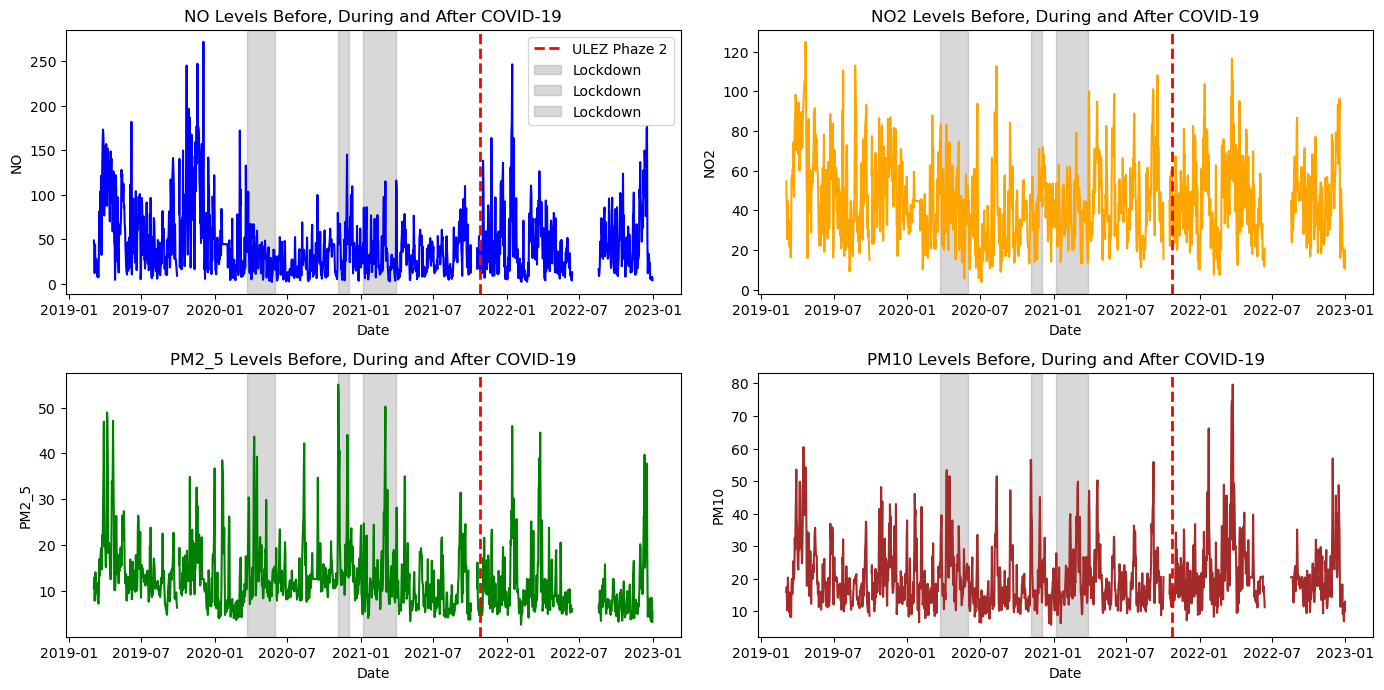

In [52]:
#Plotting each pollutant over the 4 years, with lockdown periods and ULEZ introduction date marked
lockdown_periods = [
    ('2020-03-23', '2020-06-01'),  #First lockdown
    ('2020-11-05', '2020-12-02'),  #Second lockdown
    ('2021-01-06', '2021-03-29')   #Third lockdown
]

#Resampling the data to daily averages
daily_data = merged_data.resample('D').mean()

plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
plt.plot(daily_data.index, daily_data['NO'], color=color_palette['NO'])
plt.title('NO Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('NO')
for start, end in lockdown_periods: #Marking Lockdown periods on graph
    plt.axvspan(start, end, color='grey', alpha=0.3, label='Lockdown')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(daily_data.index, daily_data['NO2'], color=color_palette['NO2'])
plt.title('NO2 Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('NO2')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.subplot(3, 2, 3)
plt.plot(daily_data.index, daily_data['PM2_5'], color=color_palette['PM2_5'])
plt.title('PM2_5 Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('PM2_5')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
    
plt.subplot(3, 2, 4)
plt.plot(daily_data.index, daily_data['PM10'], color=color_palette['PM10'])
plt.title('PM10 Levels Before, During and After COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phaze 2')
plt.xlabel('Date')
plt.ylabel('PM10')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)

plt.tight_layout()
plt.show()


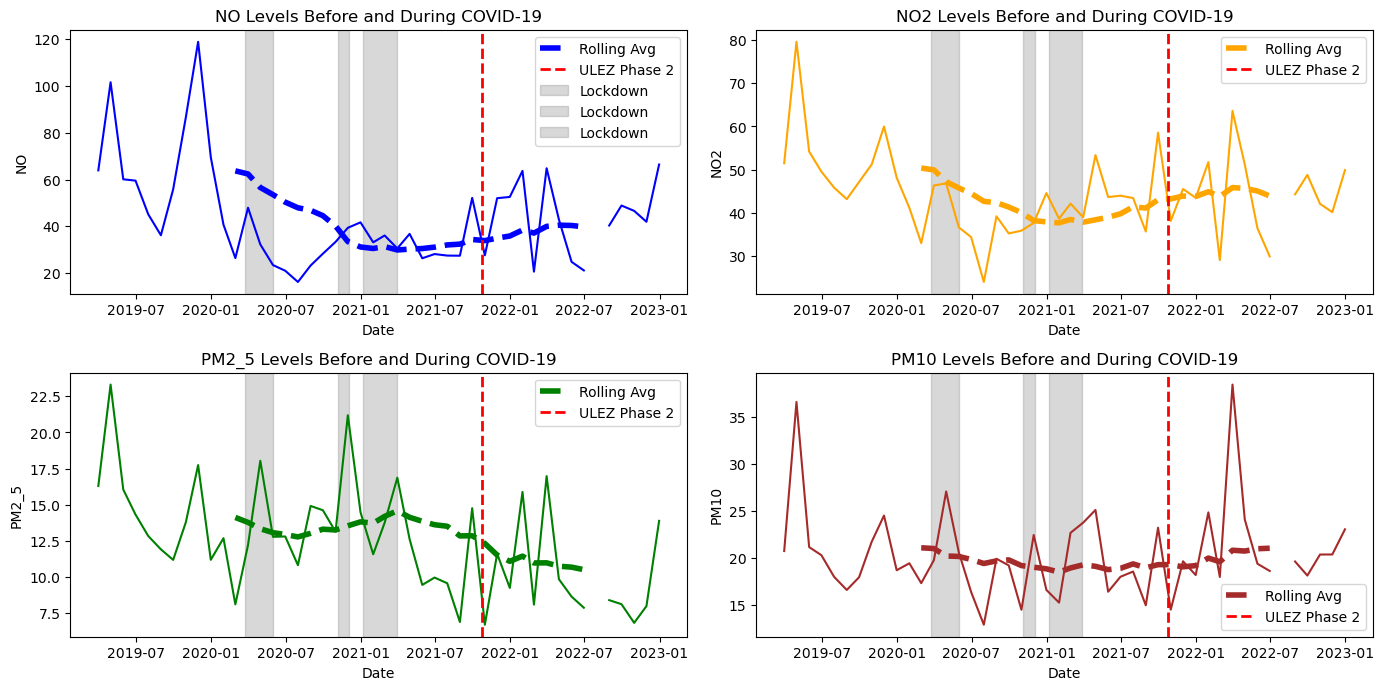

In [53]:
# Resampling data to monthly averages and plotting with rolling trendline added
monthly_data_19_22 = merged_data.resample('M').mean()

rolling_data = monthly_data_19_22.rolling(window=12).mean() #window set at 12 months

plt.figure(figsize=(14, 10))
plt.subplot(3, 2, 1)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['NO'], color=color_palette['NO'])
plt.plot(rolling_data.index, rolling_data['NO'], label='Rolling Avg', color=color_palette['NO'], linestyle='--', linewidth=4)
plt.title('NO Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('NO')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3, label='Lockdown')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['NO2'], color=color_palette['NO2'])
plt.plot(rolling_data.index, rolling_data['NO2'], label='Rolling Avg', color=color_palette['NO2'], linestyle='--', linewidth=4)
plt.title('NO2 Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('NO2')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['PM2_5'], color=color_palette['PM2_5'])
plt.plot(rolling_data.index, rolling_data['PM2_5'], label='Rolling Avg', color=color_palette['PM2_5'], linestyle='--', linewidth=4)
plt.title('PM2_5 Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('PM2_5')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(monthly_data_19_22.index, monthly_data_19_22['PM10'], color=color_palette['PM10'])
plt.plot(rolling_data.index, rolling_data['PM10'], label='Rolling Avg', color=color_palette['PM10'], linestyle='--', linewidth=4)
plt.title('PM10 Levels Before and During COVID-19')
plt.axvline(x=event_date, color='red', linestyle='--', linewidth=2, label='ULEZ Phase 2')
plt.xlabel('Date')
plt.ylabel('PM10')
for start, end in lockdown_periods:
    plt.axvspan(start, end, color='grey', alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()


### Observations:
- NO: There was a notable decline in pollutant levels during the lockdown/restriction period, succeeded by a gradual rise in 2022, albeit remaining below 2019 levels.
- NO2: A distinct reduction in pollutant levels was observed during the lockdown/restriction phase, with a subsequent increase in mid-2021, still below 2019 levels.
- PM2.5: Pollution levels during the national lockdown period were comparable to those of 2019, with occasional higher spikes noted. However, this was followed by a significant decline in summer 2021 and summer 2022, demonstrating an overall downward trend.
- PM10: A clear decrease in pollutant levels was evident during the lockdown/restriction period, succeeded by a sharp increase in spring 2022, surpassing pre-COVID highs.

### Adding traffic figures for the same time period and local authority.
The UK Government's [road traffic figures](https://roadtraffic.dft.gov.uk/downloads) report the total volume of traffic, measured in vehicle miles, for each local authority over the course of a year. Although the data is summarized annually, it can be used to illustrate overall traffic trends and compare these trends with yearly pollutant level trends.

In [54]:
traffic_df = pd.read_csv('local_authority_traffic_1993_2023.csv')
traffic_df.head()

,local_authority_id,local_authority_name,local_authority_code,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
0,1,Isles of Scilly,E06000053,1993,36.01,22.38,9.000000e+05,1.400000e+06
1,2,Nottinghamshire,E10000024,1993,4650.69,2889.80,2.702600e+09,3.368900e+09
2,3,Glasgow City,S12000049,1993,1768.54,1098.92,1.381200e+09,1.662600e+09
3,4,North Lanarkshire,S12000050,1993,1606.71,998.36,1.253500e+09,1.547600e+09
4,5,Somerset,E06000066,1993,6630.33,4119.90,2.410300e+09,2.958200e+09


In [55]:
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6353 entries, 0 to 6352
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   local_authority_id    6353 non-null   int64  
 1   local_authority_name  6353 non-null   object 
 2   local_authority_code  6353 non-null   object 
 3   year                  6353 non-null   int64  
 4   link_length_km        6353 non-null   float64
 5   link_length_miles     6353 non-null   float64
 6   cars_and_taxis        6353 non-null   float64
 7   all_motor_vehicles    6353 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 397.2+ KB


In [56]:
H_F_traffic = traffic_df[(traffic_df['local_authority_name'].str.contains('Hammersmith', case=False, na=False))& (traffic_df['year'] > 2018)  & (traffic_df['year'] < 2023)]
H_F_traffic

,local_authority_id,local_authority_name,local_authority_code,year,link_length_km,link_length_miles,cars_and_taxis,all_motor_vehicles
5468,146,Hammersmith and Fulham,E09000013,2019,220.00,136.70,241700000.0,328000000.0
5673,146,Hammersmith and Fulham,E09000013,2020,219.81,136.58,180600000.0,255500000.0
5877,146,Hammersmith and Fulham,E09000013,2021,219.91,136.65,205700000.0,289000000.0
6083,146,Hammersmith and Fulham,E09000013,2022,219.88,136.63,214800000.0,303200000.0


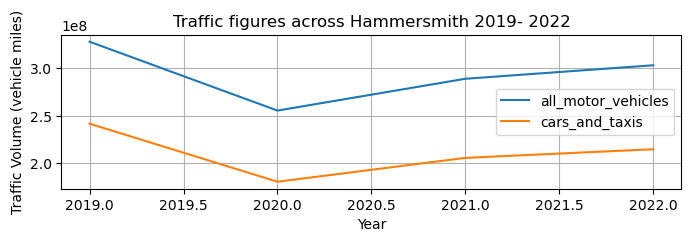

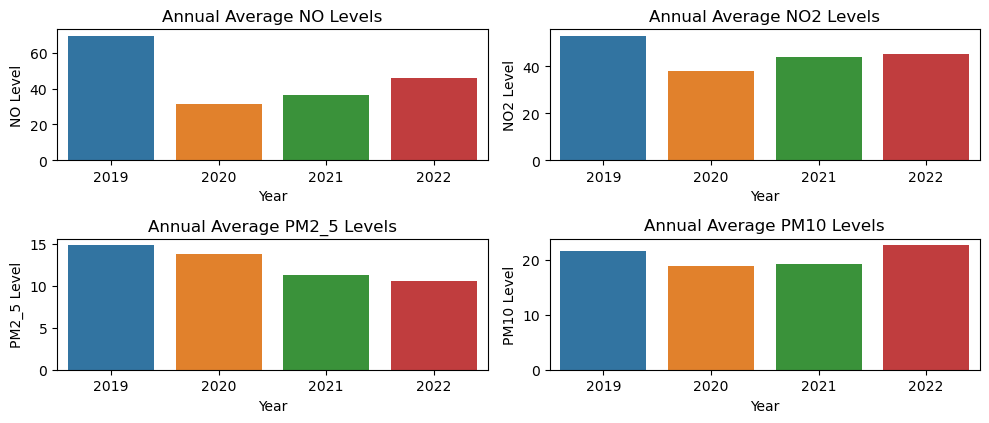

In [60]:
# Resampling the pollutant levels data to yearly averages
yearly_data = merged_data.resample('Y').mean()

#Plotting raod traffic data
plt.figure(1, figsize=(8, 2))
plt.plot(H_F_traffic.year, H_F_traffic.all_motor_vehicles, label='all_motor_vehicles')
plt.plot(H_F_traffic.year, H_F_traffic.cars_and_taxis, label='cars_and_taxis')
plt.xlabel('Year')
plt.ylabel('Traffic Volume (vehicle miles)')
plt.title('Traffic figures across Hammersmith 2019- 2022')
plt.legend()
plt.grid()
plt.show()

#Plotting pollutant data to compare 4 years average levels
plt.figure(2, figsize=(10, 6))
pollutants = ['NO', 'NO2', 'PM2_5','PM10']
for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(3, 2, i)
    sns.barplot(data=yearly_data, x=yearly_data.index.year, y=pollutant)
    plt.title(f'Annual Average {pollutant} Levels')
    plt.xlabel('Year')
    plt.ylabel(f'{pollutant} Level')

plt.tight_layout()
plt.show()


### Observations:

The yearly summary bar charts for NO and NO2 reaffirm the trends shown in the earlier line plots and align with the traffic volume data. There is a clear correlation between traffic volume and the levels of these two pollutants. Specifically, there is a notable decrease in pollutant levels in 2020, followed by an increase in 2021 and a smaller increase in 2022. Both post-2020 increases remain significantly below pre-COVID levels. The slowed increase in 2022 can be partially attributed to the introduction of the Ultra Low Emission Zone (ULEZ), which has eliminated a significant number of non-compliant vehicles.

The yearly summary bar chart for PM2.5 indicates a relatively minor impact from COVID in 2020 but shows a significant decrease in 2021 and a further decline in 2022. This trend appears to be more closely related to the introduction of ULEZ and is largely attributed to the reduction of high-emission vehicles, encouragement of cleaner vehicle use, and improved traffic flow and public transportation options.

Finally, the bar chart for PM10 shows a reduction in levels during the COVID-19 pandemic but then a subsequent increase in 2022 to levels exceeding those of 2019. This is likely due to the persistence of non-exhaust emissions, the return of increased construction activities, and natural sources of PM10.

With ULEZ having less significant impact than Covid, it is evident that more traffic reduction measures need to be explored and promoted for a long lasting air quality improvement. Some of these could include:

- Promoting electric and hybrid vehicles through subsidies and incentives.
- Expanding charging infrastructure for electric vehicles across the city.
- Improving public transportation frequency, reliability, and coverage.
- Developing cycling and walking infrastructure, including bike-sharing schemes.
- Implementing congestion charging with dynamic pricing to reduce traffic during peak times.
- Creating car-free zones and days to reduce vehicle traffic in city centers.
- Encouraging telecommuting and flexible working hours to reduce peak-hour traffic.
- Incentivizing ridesharing and carpooling with dedicated lanes and reduced parking fees.
- Conducting education and awareness campaigns to promote alternative transportation modes.
- Utilizing technological innovations in traffic management to optimize flow and reduce congestion.
- Regular reviews and updates to emission standards for vehicles within LEZs and ULEZs.